In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

# make sure tensorflow and Keras are installed. Use !pip if you are running the code on Google Colab
# pip install tensorflow
# pip install keras
# pip install keras-utils

# Helpful ML imports used later
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
print('Imports complete')

ModuleNotFoundError: No module named 'numpy'

In [ ]:
# We are going to work on a classification problem
# The dataset is the famous penguins dataset available here: https://github.com/allisonhorst/palmerpenguins
# Also see: https://www.kaggle.com/parulpandey/penguin-dataset-the-new-iris
# The dataset has been modified to make all features numeric, except for the species column
data = pd.read_csv('penguins_cleaned_ds620.csv')
print('Data loaded. Rows:', data.shape[0], 'Columns:', data.shape[1])

In [ ]:
# Question #1: How many features are there in the dataset? Show the code that extracts this number
# We'll try to detect the target (species) column automatically and count the remaining columns as features
possible_targets = ['species', 'Species', 'species_label', 'SpeciesLabel']
target_col = None
for c in possible_targets:
    if c in data.columns:
        target_col = c
        break
if target_col is None:
    # fall back to assuming the last column is the target
    target_col = data.columns[-1]
feature_cols = data.columns.drop(target_col)
num_features = len(feature_cols)
print('Detected target column:', target_col)
print('Number of features:', num_features)

In [ ]:
# Question #2: What are the features in the dataset? Show the code that lists the feature names
print('Feature columns:')
print(list(feature_cols))

bill_length_mm
bill_depth_mm
flipper_length_mm
body_mass_g
species


In [ ]:
# Question #3: How many species are there in the dataset? Show the code that extracts this number
num_species = data[target_col].nunique()
print("Number of species:", num_species)

In [ ]:
# We are going to train a classifier using Keras on the Penguin dataset
# before we do, let's split the dataset into data and classes, where the classes are in the species columns
# The data will be in X and the species will be in y

# Question #4: Assign the features to the X and the labels to y - show the code that creates X and y
X = data[feature_cols].copy()
y_raw = data[target_col].copy()
# encode labels to integers (0..n-1) to be compatible with Keras to_categorical later
le = LabelEncoder()
y = le.fit_transform(y_raw)
print('X shape:', X.shape)
print('y shape:', y.shape)
print('Label classes:', list(le.classes_))

In [ ]:
# To reduce any potential bias, let's standardize the data in the X dataframe
# use the standard scaler to scale X

# Question #5: complete the code below so it results in a scaled X dataframe. Let's call the scaled version X for simplicity
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=feature_cols)
print('Scaled X: mean ~', X.values.mean().round(3), 'std ~', X.values.std().round(3))

In [ ]:
# Let's split the dataset into training and testing sets

# Question #6: complete the code below to split X and y into training and testing sets with 20% testing and a randomSeed=42
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values, y, test_size=0.2, random_state=42)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

In [ ]:
# Let's make sure y values are recorded as categorical
#from tensorflow.keras.to_categorical import to_categorical
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
print('y_train shape after to_categorical:', y_train.shape)

In [ ]:
# We are now ready to train our classifiers using the Keras APIs
# Let's start with the Keras Sequential API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Defining our model as sequential
model = Sequential()

In [ ]:
# Here is the code that sends the input X_train into a model with 32 nodes in the first hidden layer
model.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[1],), name='input'))

In [ ]:
# Question #7: show code that adds another dense hidden layer with another 32 nodes
model.add(Dense(units=32, activation='relu', name='hidden2'))

In [ ]:
# Question #8: show code that adds the output layer using softmax. Remember that there are three output nodes (3 species)
model.add(Dense(units=3, activation='softmax', name='output'))

In [ ]:
# Question #9: use model summary to confirm the model you built - show the function call below
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 32)                160       
_________________________________________________________________
hidden (Dense)               (None, 32)                1056      
_________________________________________________________________
output (Dense)               (None, 3)                 99        
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Question #10: compile the code using a) categorical_crossentropy for the loss function, b) stochastic gradient descent with a 0.01 learning rate as the optimizer, and c) accuracy as the metric
from keras.optimizers import SGD
opt = SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print('Model compiled')

In [ ]:
# Question #11: train the model using using a) a batch size of 16, b) 50 epochs (iterations), and a validation split of 20%
#
perf = model.fit(X_train, y_train, batch_size=16, epochs=50, validation_split=0.2, verbose=2)

Epoch 1/50
14/14 [==============================] - 1s 18ms/step - loss: 1.1943 - accuracy: 0.4147 - val_loss: 0.9874 - val_accuracy: 0.4444
Epoch 2/50
14/14 [==============================] - 0s 5ms/step - loss: 0.9838 - accuracy: 0.4446 - val_loss: 0.8521 - val_accuracy: 0.6296
Epoch 3/50
14/14 [==============================] - 0s 5ms/step - loss: 0.8675 - accuracy: 0.7211 - val_loss: 0.7539 - val_accuracy: 0.8333
Epoch 4/50
14/14 [==============================] - 0s 5ms/step - loss: 0.7801 - accuracy: 0.7769 - val_loss: 0.6761 - val_accuracy: 0.8519
Epoch 5/50
14/14 [==============================] - 0s 5ms/step - loss: 0.6981 - accuracy: 0.7879 - val_loss: 0.6044 - val_accuracy: 0.8519
Epoch 6/50
14/14 [==============================] - 0s 5ms/step - loss: 0.6039 - accuracy: 0.8427 - val_loss: 0.5445 - val_accuracy: 0.8519
Epoch 7/50
14/14 [==============================] - 0s 5ms/step - loss: 0.5590 - accuracy: 0.8423 - val_loss: 0.4939 - val_accuracy: 0.8519
Epoch 8/50
14/14 [=

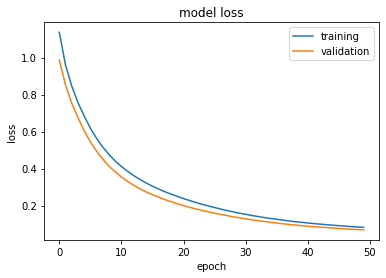

In [ ]:
# use this code to plot the training metrics
plt.plot(perf.history['loss'])
plt.plot(perf.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

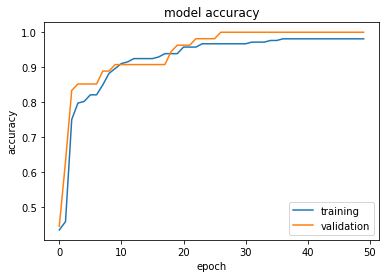

In [ ]:
# Question #12 using the above code as example, plot the accuracy for the training and validation
# change the labels accordingly
plt.plot(perf.history['accuracy'])
plt.plot(perf.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [ ]:
# Using model.predict on X_test to get the predictions
class_predictions = np.argmax(model.predict(X_test), axis=-1)
print('Sample predictions (first 10):', class_predictions[:10])

In [ ]:
# Question #13
# write some code that will calulate the accuracy of the model by comparing y_test to class_predictions
# the answer must be in percentages
test_accuracy = np.round(np.mean(class_predictions == y_test) * 100, 2)
print('Test accuracy (%):', test_accuracy)

In [ ]:
# Question #14 how does the test accuracy compare to the training accuracy?
train_acc_final = perf.history['accuracy'][-1] if 'accuracy' in perf.history else None
val_acc_final = perf.history['val_accuracy'][-1] if 'val_accuracy' in perf.history else None
print('Final training accuracy:', train_acc_final)
print('Final validation accuracy:', val_acc_final)
print('Final test accuracy (%):', test_accuracy)

In [ ]:
# Question #15 run the following code to printout the results of your comparison
print("Test Accuracy : " + str(test_accuracy) + '%')
print("Predictions :")
print(class_predictions)
print("Targets :")
print(np.asarray(y_test,dtype="int32"))

Test Accuracy : 97.01492537313433%
Predictions :
[0 2 0 1 0 2 2 1 1 1 0 0 0 0 2 0 0 1 0 2 0 0 2 1 0 0 1 2 1 2 1 2 0 0 2 2 1
 1 0 0 0 0 1 1 0 0 2 0 0 2 0 1 1 0 0 1 0 0 1 1 0 2 2 0 0 2 0]
Targets :
[0 2 0 1 0 2 2 1 1 1 0 0 2 0 2 0 0 1 0 2 0 0 2 1 0 0 1 2 1 2 1 2 0 0 2 2 1
 1 0 0 0 0 1 1 0 0 2 0 0 2 0 1 1 0 0 1 0 0 1 1 2 2 2 0 0 2 0]
